# 1. Setup and Get Data 
## 1.1 Install Depencencies and Setup

In [1]:
!pip install labelme albumentations opencv-python

## 1.2 Collect images using OpenCV

In [2]:
import os
import time 
import uuid
import cv2


In [3]:
IMAGE_PATH = os.path.join('data','images')
num_images = 30


In [4]:
cap = cv2.VideoCapture(0)
for i in range(num_images):
    print("Collecting image{}".format(i))
    ret, frame = cap.read()
    image_name = os.path.join(IMAGE_PATH,f'{ str(uuid.uuid4())}.jpg')
    cv2.imwrite(image_name, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


## 1.3 Annotate Images with LabelMe

In [5]:
!labelme

2024-11-17 10:41:38,694 [INFO   ] __init__:get_config:67- Loading config file from: /home/ritz/.labelmerc
QObject::moveToThread: Current thread (0x58442ed59b50) is not the object's thread (0x58442fe93230).
Cannot move to target thread (0x58442ed59b50)

qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/home/ritz/DeepL/ImageClassification/imageclassification/lib/python3.10/site-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb, linuxfb, minimal, offscreen, vnc, webgl.



# 2. Review Dataset and Build Image loading Function 

## 2.1 Import TF and Deps

In [6]:
import tensorflow as tf 
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

2024-11-17 10:41:39.255298: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-17 10:41:39.380341: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731836499.442016    5421 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731836499.462393    5421 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-17 10:41:39.581802: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

## 2.2 Limit GPU Memory Growth 


In [7]:
# Avoid OOM errors by setting the GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 2.3 Load Images into TF Data pipeline 

In [9]:
images = tf.data.Dataset.list_files('data/images/*.jpg', shuffle=False)

I0000 00:00:1731836501.845004    5421 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6140 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [10]:
images.as_numpy_iterator().next()

b'data/images/00d68ce1-f3fa-4d22-932b-09d8603146c6.jpg'

In [11]:
def load_image(x):
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [12]:
images = images.map(load_image)


In [13]:
images.as_numpy_iterator().next()

2024-11-17 11:05:13.386254: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: data/images/017f3962-f3ae-44b3-8b13-eedfd46e5183.jpg; No such file or directory
2024-11-17 11:05:13.386331: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: data/images/06ce17ad-a34f-49c0-bdd0-debd33bbe743.jpg; No such file or directory
2024-11-17 11:05:13.386381: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: data/images/13614d23-bea6-4164-a2e2-a30925e3830b.jpg; No such file or directory
2024-11-17 11:05:13.386400: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: data/images/112e73b5-8ada-4bb4-b628-33c516fafc72.jpg; No such file or directory
2024-11-17 11:05:13.386447: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FO

array([[[ 90,  26,  16],
        [ 90,  26,  16],
        [ 91,  26,  20],
        ...,
        [ 96,  97,  99],
        [ 96,  97, 101],
        [ 97,  98, 102]],

       [[ 92,  28,  19],
        [ 92,  28,  19],
        [ 91,  26,  20],
        ...,
        [ 97,  98, 100],
        [ 98,  99, 103],
        [ 99, 100, 104]],

       [[ 91,  26,  20],
        [ 91,  26,  20],
        [ 91,  26,  22],
        ...,
        [ 98, 100,  99],
        [ 99, 100, 102],
        [100, 101, 103]],

       ...,

       [[ 70,  53,  33],
        [ 71,  54,  34],
        [ 70,  53,  35],
        ...,
        [  5,  10,  13],
        [  6,  11,  14],
        [  6,  11,  14]],

       [[ 69,  52,  32],
        [ 69,  52,  32],
        [ 68,  51,  33],
        ...,
        [  5,  11,  11],
        [  5,  11,  11],
        [  5,  11,  11]],

       [[ 69,  52,  32],
        [ 69,  52,  32],
        [ 69,  52,  34],
        ...,
        [  4,  10,  10],
        [  4,  10,  10],
        [  4,  10,  10]]

In [15]:
type(images)
images.as_numpy_iterator().next().shape

2024-11-17 11:07:13.522164: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: data/images/06ce17ad-a34f-49c0-bdd0-debd33bbe743.jpg; No such file or directory
2024-11-17 11:07:13.522255: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: data/images/017f3962-f3ae-44b3-8b13-eedfd46e5183.jpg; No such file or directory
2024-11-17 11:07:13.522353: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: data/images/112e73b5-8ada-4bb4-b628-33c516fafc72.jpg; No such file or directory
2024-11-17 11:07:13.522423: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: data/images/13614d23-bea6-4164-a2e2-a30925e3830b.jpg; No such file or directory
2024-11-17 11:07:13.522498: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FO

(480, 640, 3)

## 2.4 Visualize the Raw images

In [16]:
image_generator = images.batch(4).as_numpy_iterator()

In [24]:
plot_images = image_generator.next()

2024-11-17 11:10:16.322066: W tensorflow/core/framework/op_kernel.cc:1841] OP_REQUIRES failed at whole_file_read_ops.cc:116 : NOT_FOUND: data/images/7c154450-8734-4d35-a682-ff51f1a2e321.jpg; No such file or directory


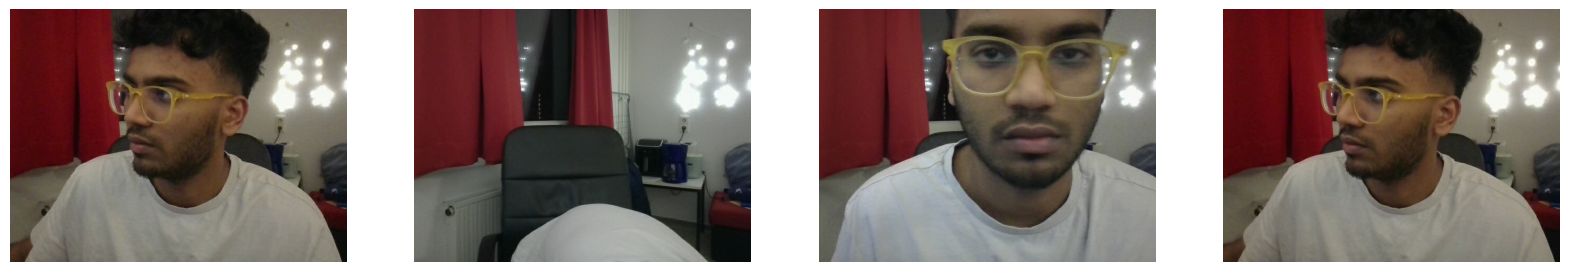

In [25]:
fig, ax = plt.subplots(1, 4, figsize=(20, 20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
    ax[idx].axis('off')
plt.show()

# 3. Partition Unaugmented Data

## 3.1 Manually SPLIT Data into Train Test and Val 

In [27]:
90*.7 # 63 for train 

62.99999999999999

In [28]:
90*.15 # 14 and 13 for validation and test

13.5

## 3.2 Move the Matching Labels 

In [31]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data',folder, 'images')):

        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data',folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

# 4. Apply Image Augmentation on Images and Labels using Albumentations 

## 4.1 Setup Albumentations Transform Pipeline 

In [32]:
import albumentations as alb

In [47]:
cv2.imread(os.path.join('data','train','images', '0a54f263-20b2-4a42-ae1a-7b517b766331.jpg'))

array([[[ 22,  37, 106],
        [ 22,  37, 106],
        [ 22,  37, 106],
        ...,
        [114, 114, 120],
        [116, 115, 119],
        [116, 115, 119]],

       [[ 25,  40, 109],
        [ 25,  40, 109],
        [ 25,  40, 109],
        ...,
        [112, 112, 118],
        [115, 114, 118],
        [115, 114, 118]],

       [[ 27,  42, 111],
        [ 27,  42, 111],
        [ 26,  41, 110],
        ...,
        [112, 113, 117],
        [115, 114, 118],
        [116, 115, 119]],

       ...,

       [[ 44,  67,  83],
        [ 45,  68,  84],
        [ 46,  69,  85],
        ...,
        [ 15,  14,  10],
        [ 20,  19,  15],
        [ 22,  21,  17]],

       [[ 44,  65,  80],
        [ 43,  66,  81],
        [ 44,  67,  83],
        ...,
        [ 19,  20,  18],
        [ 16,  17,  13],
        [ 14,  15,  11]],

       [[ 43,  64,  79],
        [ 45,  66,  81],
        [ 45,  68,  84],
        ...,
        [ 20,  23,  21],
        [ 17,  18,  14],
        [ 18,  19,  15]]

In [48]:
image.shape

(480, 640, 3)

In [41]:
augmentor= alb.Compose([alb.RandomCrop(width=450, height=450),
                        alb.HorizontalFlip(p=0.5),
                        alb.VerticalFlip(p=0.5),
                        alb.RandomBrightnessContrast(p=0.2),
                        alb.RandomGamma(p=0.2),
                        alb.RGBShift(p=0.2)],
                        bbox_params=alb.BboxParams(format='albumentations', label_fields=['class_labels']))

# 4.2 Load a Test Image and Annotation with OpenCv and JSON

In [49]:
img = cv2.imread(os.path.join('data','train','images', '0a54f263-20b2-4a42-ae1a-7b517b766331.jpg'))

In [50]:
img


array([[[ 22,  37, 106],
        [ 22,  37, 106],
        [ 22,  37, 106],
        ...,
        [114, 114, 120],
        [116, 115, 119],
        [116, 115, 119]],

       [[ 25,  40, 109],
        [ 25,  40, 109],
        [ 25,  40, 109],
        ...,
        [112, 112, 118],
        [115, 114, 118],
        [115, 114, 118]],

       [[ 27,  42, 111],
        [ 27,  42, 111],
        [ 26,  41, 110],
        ...,
        [112, 113, 117],
        [115, 114, 118],
        [116, 115, 119]],

       ...,

       [[ 44,  67,  83],
        [ 45,  68,  84],
        [ 46,  69,  85],
        ...,
        [ 15,  14,  10],
        [ 20,  19,  15],
        [ 22,  21,  17]],

       [[ 44,  65,  80],
        [ 43,  66,  81],
        [ 44,  67,  83],
        ...,
        [ 19,  20,  18],
        [ 16,  17,  13],
        [ 14,  15,  11]],

       [[ 43,  64,  79],
        [ 45,  66,  81],
        [ 45,  68,  84],
        ...,
        [ 20,  23,  21],
        [ 17,  18,  14],
        [ 18,  19,  15]]

In [51]:
with open(os.path.join('data','train','labels', '0a54f263-20b2-4a42-ae1a-7b517b766331.json'),'r') as f:
    label = json.load(f)

In [52]:
label

{'version': '5.5.0',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[215.32710280373834, 5.887850467289731],
    [467.66355140186914, 315.2336448598131]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None}],
 'imagePath': '../images/0a54f263-20b2-4a42-ae1a-7b517b766331.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnL

In [53]:
type(label)

dict

In [58]:
label['shapes'][0]['label']

'face'

In [56]:
label['shapes'][0]['points']

[[215.32710280373834, 5.887850467289731],
 [467.66355140186914, 315.2336448598131]]

In [55]:
type(label['shapes'])

list

## 4.3 Extract Coordinates and Rescale to Match Image Resoltion 

In [65]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

coords


[215.32710280373834, 5.887850467289731, 467.66355140186914, 315.2336448598131]

In [68]:
coords = list(np.divide(coords,[640,480,640,480]))

In [69]:
coords

[np.float64(0.33644859813084116),
 np.float64(0.01226635514018694),
 np.float64(0.7307242990654206),
 np.float64(0.6567367601246107)]

# 4.4 Apply Augmentations and View Results 

In [70]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [71]:
augmented

{'image': array([[[154, 149, 150],
         [155, 151, 150],
         [152, 151, 147],
         ...,
         [ 46,  55,  64],
         [ 46,  56,  63],
         [ 46,  55,  64]],
 
        [[153, 148, 149],
         [154, 149, 150],
         [152, 151, 147],
         ...,
         [ 45,  55,  62],
         [ 45,  56,  60],
         [ 45,  55,  62]],
 
        [[152, 147, 148],
         [153, 148, 149],
         [152, 151, 147],
         ...,
         [ 48,  59,  63],
         [ 49,  61,  63],
         [ 50,  61,  65]],
 
        ...,
 
        [[123, 128, 129],
         [123, 128, 129],
         [122, 126, 127],
         ...,
         [ 25,  40, 109],
         [ 25,  40, 109],
         [ 25,  40, 109]],
 
        [[123, 128, 129],
         [124, 129, 130],
         [125, 128, 132],
         ...,
         [ 25,  40, 109],
         [ 26,  41, 110],
         [ 26,  41, 110]],
 
        [[123, 128, 129],
         [123, 128, 129],
         [121, 126, 129],
         ...,
         [ 26,  41,

In [72]:
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [74]:
augmented['image'].shape

(450, 450, 3)

In [75]:
augmented['bboxes']

[[0.0, 0.30392526414659293, 0.5214953104654948, 0.9913603318399853]]

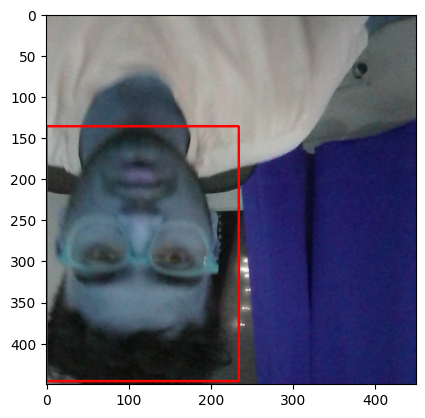

In [77]:
cv2.rectangle(augmented['image'],
            tuple(np.multiply(augmented['bboxes'][0][:2],[450,450]).astype(int)),
            tuple(np.multiply(augmented['bboxes'][0][2:],[450,450]).astype(int)),
                (255,0,0),2)
plt.imshow(augmented['image'])
plt.show()


# 5. Build and Run Augmentation Pipeline 

# 5.1 Run augmentation Pipeline 

In [80]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

/home/ritz/DeepL/ImageClassification/imageclassification/lib/python3.10/site-packages/albumentations/core/bbox_utils.py:478: RuntimeWarning: invalid value encountered in divide
  & (clipped_box_areas / denormalized_box_areas >= min_visibility - epsilon)


x_max is less than or equal to x_min for bbox [6.14632010e-01 6.55763268e-01 5.84112131e-04 6.42523356e-03
 0.00000000e+00].
